In [4]:
#import libraries
import pandas as pd

In [5]:
#load dataset
adult =pd.read_csv("adult_with_headers.csv",index_col=0)

#Data Exploration

In [6]:
adult.head()

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,,,,,,,,,,,,,,
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#Data Structure
adult.shape

(32561, 14)

In [8]:
#check datatypes
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 39 to 52
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


datatypes are as expected. No null values

In [9]:
#summary statistics
adult.describe()

,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#Scaling

##Standard Scaling

In [10]:
#import libraries
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

In [11]:
#Select only integer or float features for scaling
numerical_features = adult.select_dtypes(include=['int64', 'float64']).columns
numerical_data = adult[numerical_features]

In [12]:
#Standardize the data (0 mean, 1 standard deviation)
array = numerical_data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

#summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:]) #prints z scores

[[-1.06  1.13  0.15 -0.22 -0.04]
 [-1.01  1.13 -0.15 -0.22 -2.22]
 [ 0.25 -0.42 -0.15 -0.22 -0.04]
 [ 0.43 -1.2  -0.15 -0.22 -0.04]
 [ 1.41  1.13 -0.15 -0.22 -0.04]]


##Min-Max Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
array = numerical_data.values
scaler = MinMaxScaler (feature_range = (0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.04 0.8  0.02 0.   0.4 ]
 [0.05 0.8  0.   0.   0.12]
 [0.14 0.53 0.   0.   0.4 ]
 [0.15 0.4  0.   0.   0.4 ]
 [0.22 0.8  0.   0.   0.4 ]]




> Which scenario is each scaling technique preferred and why?

***Standard Scaling (Z-score normalization):***

What it does: Centers the data around 0 with a standard deviation of 1. This is done by subtracting the mean and dividing by the standard deviation for each feature.

**When it's preferred:**


*   **Algorithms that assume a Gaussian distribution:** Many machine learning algorithms, like linear regression, logistic regression, and Support Vector Machines (SVM), often assume that the features are normally distributed. Standard Scaling helps to satisfy this assumption.
*   **When scale invariance is important:** In algorithms like Principal Component Analysis (PCA) where the scale of features matters, Standard Scaling ensures that all features contribute equally.
*   **When outliers are not a major concern:** Standard Scaling doesn't handle outliers very well. They will still be present in the scaled data.


***Min-Max Scaling (Normalization):***

**What it does:** Scales the data to a specific range, typically between 0 and 1.

*   When it's preferred: Algorithms that don't make assumptions about data distribution: Algorithms like K-Nearest Neighbors (KNN) and neural networks are less sensitive to data distribution.
Preserving the original distribution's shape: Min-Max Scaling maintains the relative relationships between data points.



*   
When you need a specific range: If your data needs to be within a particular range for a specific algorithm or application, Min-Max Scaling provides that control.
*   
When outliers are a concern: Min-Max Scaling is less sensitive to outliers because it uses the range of the data, which is less influenced by extreme values.






















#Encoding Techniques

In [15]:
categorical_features = adult.select_dtypes(include=['object']).columns
categorical_data = adult[categorical_features]
categorical_data

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
age,,,,,,,,,
39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [16]:
categorical_data.nunique()

,0
workclass,9
education,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2
native_country,42
income,2


##One-hot encoding

In [17]:
#Apply one hot encoding to categorical variables with less than 5 categories
categorical_data_encoded = pd.get_dummies(categorical_data, columns=['race', 'sex', 'income'], drop_first=True)

In [18]:
categorical_data_encoded

,workclass,education,marital_status,occupation,relationship,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
age,,,,,,,,,,,,
39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,United-States,0,0,0,1,1,0
50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,United-States,0,0,0,1,1,0
38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,United-States,0,0,0,1,1,0
53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,United-States,0,1,0,0,1,0
28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Cuba,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,United-States,0,0,0,1,0,0
40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,United-States,0,0,0,1,1,1
58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,United-States,0,0,0,1,0,0


##Label Encoding

In [19]:
categorical_data.nunique()

,0
workclass,9
education,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2
native_country,42
income,2


In [20]:
#import libraries
from sklearn.preprocessing import LabelEncoder

In [21]:
#Apply label encoding to categorical variables with less than 5 categories
labelencoder = LabelEncoder()

columns_to_encode = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']

# Apply label encoding to each column individually or use apply
for column in columns_to_encode:
    categorical_data_encoded[column] = labelencoder.fit_transform(categorical_data_encoded[column])

In [22]:
categorical_data_encoded

,workclass,education,marital_status,occupation,relationship,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
age,,,,,,,,,,,,
39,7,9,4,1,1,39,0,0,0,1,1,0
50,6,9,2,4,0,39,0,0,0,1,1,0
38,4,11,0,6,1,39,0,0,0,1,1,0
53,4,1,2,6,0,39,0,1,0,0,1,0
28,4,9,2,10,5,5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27,4,7,2,13,5,39,0,0,0,1,0,0
40,4,11,2,7,0,39,0,0,0,1,1,1
58,4,11,6,1,4,39,0,0,0,1,0,0




> Discuss the pros and cons of One Hot Encoding and Label Encoding

***One-Hot Encoding***


Pros:

*   **No Ordinal Relationship:** One-hot encoding avoids imposing an ordinal relationship between categories, which is important when there's no inherent order (e.g., colors, countries). It treats all categories as equally important.

*   **Improved Model Performance:** For algorithms sensitive to numerical relationships (like linear regression), one-hot encoding often leads to better performance as it avoids creating artificial ordinality.
*   **Feature Expansion:** By creating new features, it can potentially capture more complex relationships between the categories and the target variable.

Cons:

*   **High Dimensionality:** One-hot encoding can significantly increase the number of features, especially with high-cardinality categorical variables (many unique categories). This can lead to increased memory usage and computational cost, and potentially to the curse of dimensionality.

*   **Sparsity:** The resulting data matrix can become sparse (many zeros), which might require specialized algorithms or data structures to handle efficiently.
*   **Multicollinearity:** The dummy variables created are highly correlated, which can cause issues for some models. Using techniques like dropping the first dummy variable can help mitigate this.


***Label Encoding***

Pros:


*   **Simplicity:** Label encoding is straightforward and easy to implement.


*   **Memory Efficiency:** It uses less memory compared to one-hot encoding, especially for high-cardinality categorical variables.

*   **Lower Dimensionality:** It doesn't increase the number of features, preserving the original data structure and preventing the dimensionality explosion that can occur with one-hot encoding.

Cons:


*   **Ordinal Relationship:** It implicitly introduces an ordinal relationship between categories, which can be misleading for algorithms sensitive to numerical order. This is problematic if the categories have no inherent ranking.

*   **Potential for Misinterpretation:** Some models might misinterpret the numerical labels as having a meaningful order, leading to inaccurate predictions.

*   **Not Suitable for All Algorithms:** Label encoding might not be suitable for algorithms that are sensitive to the scale or distribution of features.


***When to choose:***




*   One-Hot Encoding: When the categorical variable has no inherent order and the increased dimensionality is manageable. Algorithms like tree-based models are often less affected by dimensionality, making one-hot encoding a good choice.
*   Label Encoding: When the categorical variable has a meaningful order (e.g., education levels), or when memory and computational efficiency are critical. Algorithms like K-Nearest Neighbors, which are sensitive to numerical distances, might benefit from label encoding if the ordinal relationship is meaningful.



#Feature Engineering

In [23]:
adult

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,,,,,,,,,,,,,,
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [24]:
#Creating 2 new features

#Reducing dimensionality by combining capital_gain and capital_loss as net_capital_gain
adult['net_capital_gain'] = adult['capital_gain'] - adult['capital_loss']

#Creating ratios between existing features can capture relationships that might not be evident individually.
adult['earnings_per_hour'] = adult['capital_gain'] / adult['hours_per_week']

In [25]:
adult

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital_gain,earnings_per_hour
age,,,,,,,,,,,,,,,,
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174,54.35
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.00
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0.00
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.00
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0.00
40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,0.00
58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0.00


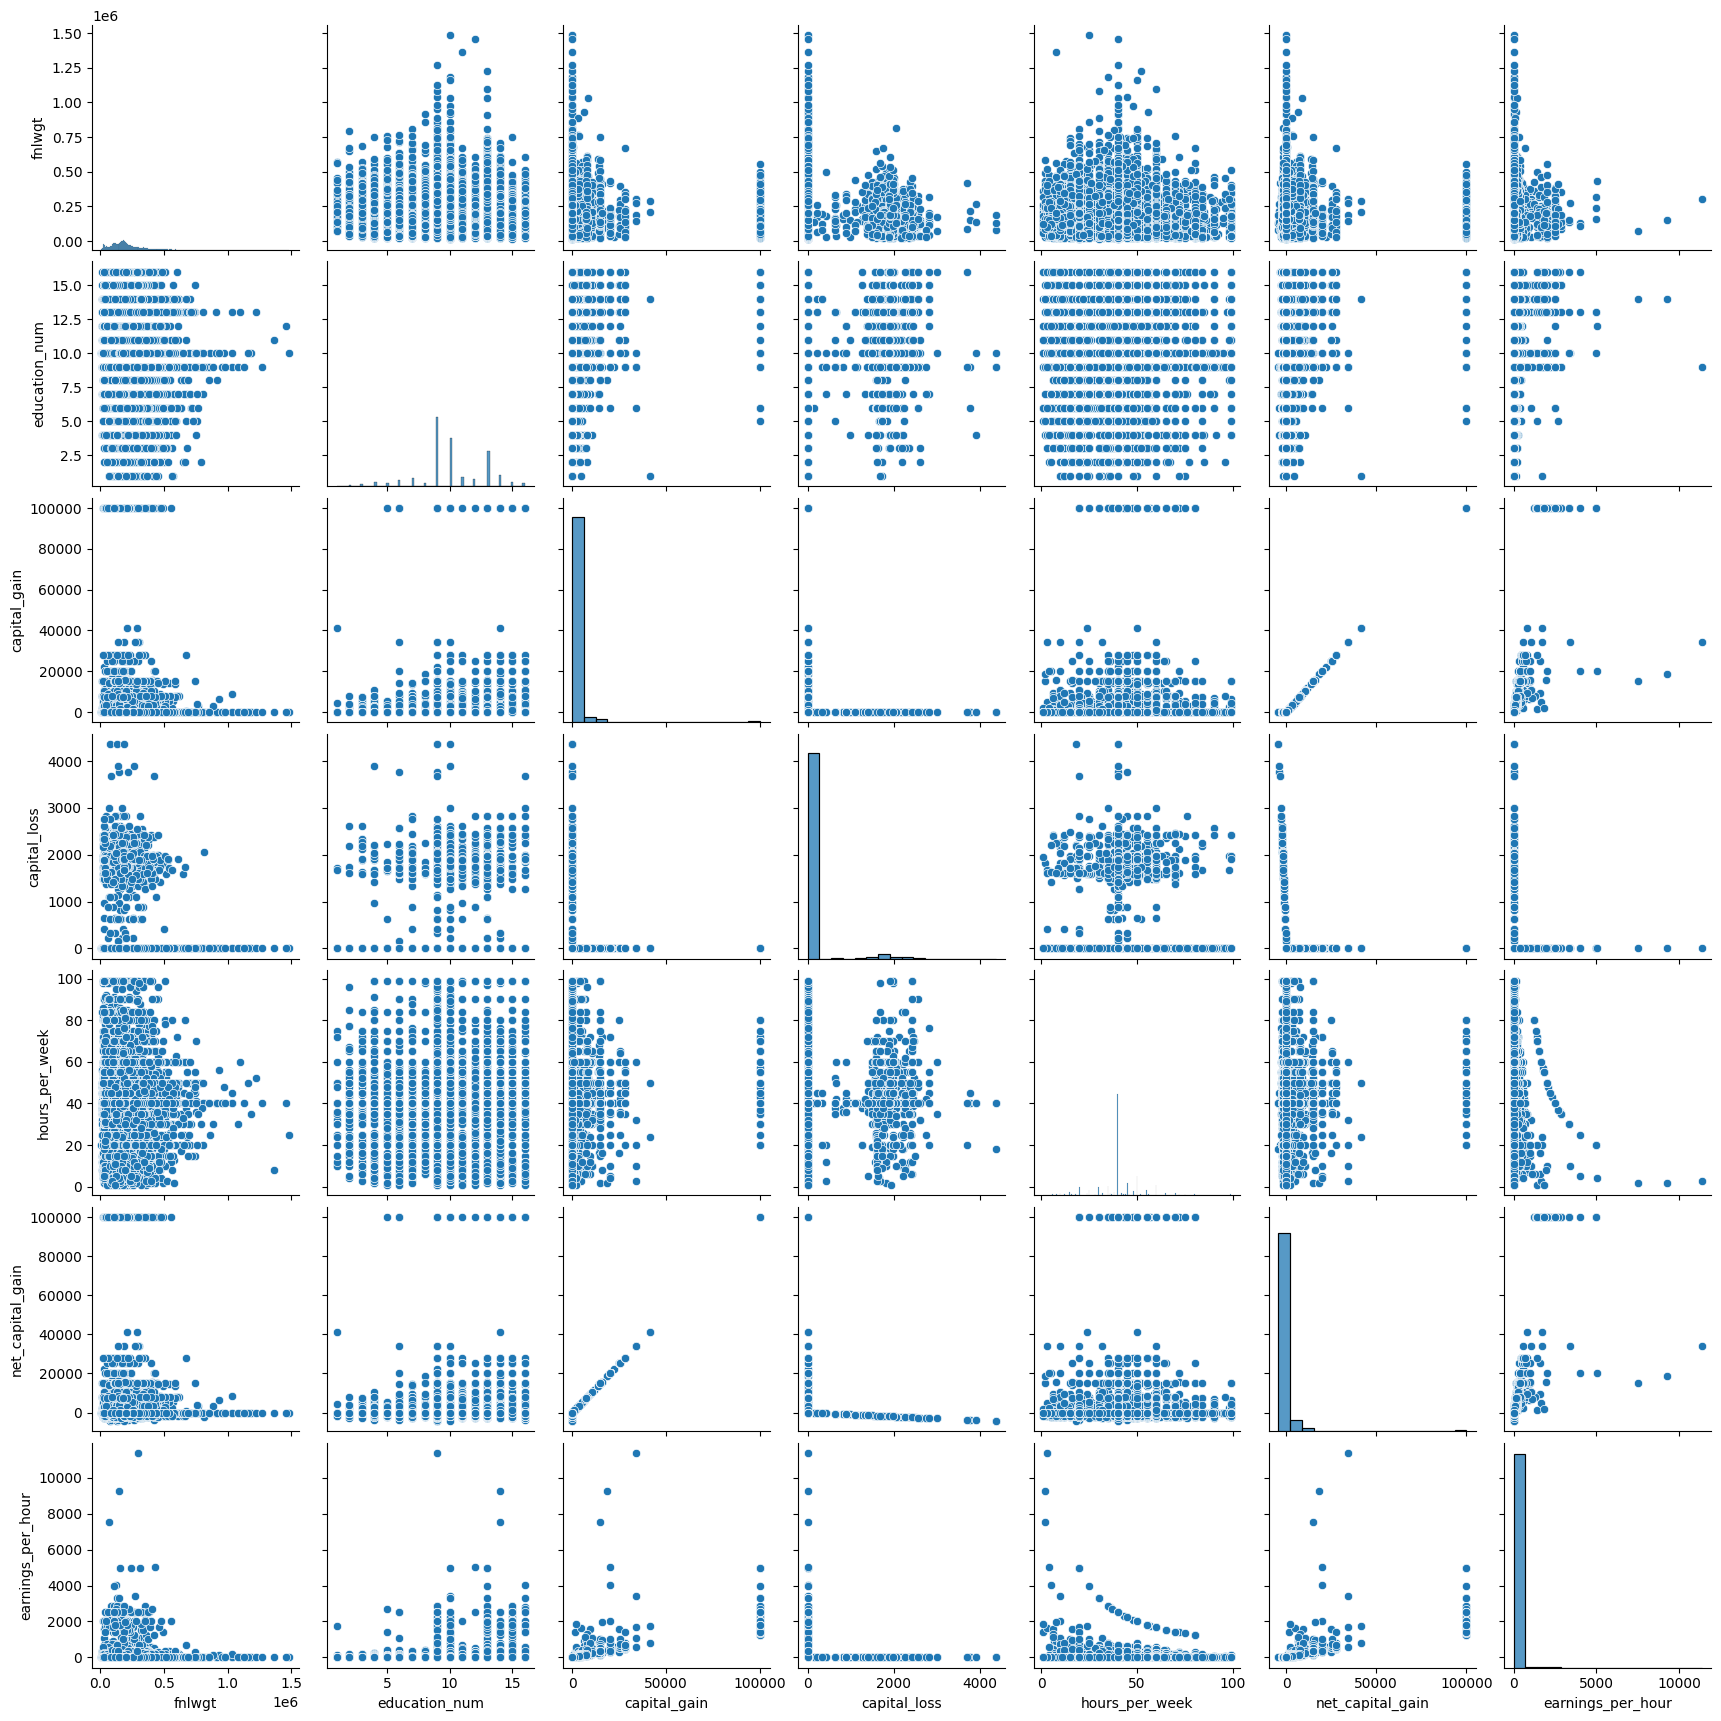

In [26]:
import seaborn as sns
sns.pairplot(adult)

Histogram: fnlwgt, capital_gain and capital_loss are all skewed numerical features.

Applying log transformation on capital_gain.

Justification for Choosing capital_gain:

Highly Skewed: capital_gain is typically highly skewed in the Adult dataset, with most values being 0 and a few very large values. This skewness can violate the assumptions of some machine learning algorithms and impact model performance.


Potential Impact on Predictions: Large values in capital_gain could disproportionately influence predictions. Transforming the feature to reduce skewness can help mitigate this issue.


Log Transformation Suitability: Log transformations are often effective for handling right-skewed data like capital_gain. They compress the range of values and make the distribution more symmetric.


Why not fnlwgt?

This feature represents the final weight, which is a sampling weight used to adjust for demographic characteristics. While it might be skewed, its interpretation is specific to the data collection process, and applying a log transformation might not be appropriate without careful consideration of its impact on the weighting scheme.

Why not capital_loss?

capital_gain is usually considered more important for predicting income in the Adult dataset. Applying the log transformation to capital_gain is likely to have a greater impact on model performance.

In [27]:
import numpy as np

# Add 1 to avoid log(0) issues. np.log1p() calculates the natural logarithm of (1 + x), which avoids errors when x is 0.
adult['log_capital_gain'] = np.log1p(adult['capital_gain'])

In [28]:
adult['log_capital_gain']

,log_capital_gain
age,
39,7.684784
50,0.000000
38,0.000000
53,0.000000
28,0.000000
...,...
27,0.000000
40,0.000000
58,0.000000


#Feature Selection

##Isolation Forest

In [29]:
#Use Isolation Forest to remove outliers
from sklearn.ensemble import IsolationForest

In [30]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(categorical_data_encoded)

IsolationForest(contamination=0.01, random_state=10)

In [31]:
# predictions
y_pred_outliers = clf.predict(categorical_data_encoded)

In [32]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
# Count the number of outliers (-1)
num_outliers = (y_pred_outliers == -1).sum()
print("Number of outliers:", num_outliers)

Number of outliers: 326


In [34]:
#remove outliers
inlier_filter = y_pred_outliers == 1
filtered_data = categorical_data_encoded[inlier_filter]

In [35]:
filtered_data

,workclass,education,marital_status,occupation,relationship,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
age,,,,,,,,,,,,
39,7,9,4,1,1,39,0,0,0,1,1,0
50,6,9,2,4,0,39,0,0,0,1,1,0
38,4,11,0,6,1,39,0,0,0,1,1,0
53,4,1,2,6,0,39,0,1,0,0,1,0
28,4,9,2,10,5,5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27,4,7,2,13,5,39,0,0,0,1,0,0
40,4,11,2,7,0,39,0,0,0,1,1,1
58,4,11,6,1,4,39,0,0,0,1,0,0




> How can outliers affect model performance?

Distorted Model Fitting: Outliers pull the model away from the true data trend, making it less accurate.


Biased Parameter Estimates: Outliers skew calculations like mean and standard deviation, leading to incorrect assumptions.


Reduced Model Accuracy: Outliers cause misclassifications and inaccurate predictions on new data.


Increased Model Complexity: Models may overfit to outliers, becoming too complex and less generalizable.


Masking True Patterns: Outliers can hide real relationships in the data, preventing the model from learning effectively.



##PPS

In [36]:
#install the package
!pip install ppscore

In [37]:
import ppscore as pps

In [41]:
pps_matrix = pps.matrix(filtered_data)
print(pps_matrix.to_string())

                            x                         y   ppscore            case  is_valid_score               metric  baseline_score  model_score                    model
0                   workclass                 workclass  1.000000  predict_itself            True                 None          0.0000     1.000000                     None
1                   workclass                 education  0.000000      regression            True  mean absolute error          2.6996     2.869939  DecisionTreeRegressor()
2                   workclass            marital_status  0.000000      regression            True  mean absolute error          1.1480     1.237775  DecisionTreeRegressor()
3                   workclass                occupation  0.108993      regression            True  mean absolute error          3.6886     3.286569  DecisionTreeRegressor()
4                   workclass              relationship  0.000000      regression            True  mean absolute error          1.2528 

Interpreting PPS values in practice:

PPS close to 0: Indicates a weak or no relationship between the features. The predictor is not useful for predicting the target.

PPS between 0.1 and 0.3: Suggests a weak to moderate predictive relationship. The predictor provides some information about the target.

PPS above 0.5: Indicates a strong predictive relationship. The predictor is likely a good candidate for predicting the target.

PPS close to 1: Suggests a very strong or near-perfect predictive relationship. The predictor can very accurately predict the target.


education -> occupation is very weak pp.

income >50k and occupation have very weak pp.



workclass -> occupation is weak pp.

marital status -> relationship is weak pp. relationship -> marital status is weak pp but higher.

occupation -> workclass is weak pp.



relationship -> male is weak pp. same vice versa.

native country -> asian-Pac-Islander is weak pp

race Black -> race White has 0.4 pp. same vice versa. But this isn't practically useful information.



In [42]:
# Calculate the correlation matrix

corr = filtered_data.corr()
corr

,workclass,education,marital_status,occupation,relationship,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
workclass,1.000000,0.019869,-0.064199,0.250862,-0.088713,-0.011939,0.010610,-0.058070,-0.001536,0.050900,0.094129,0.050763
education,0.019869,1.000000,-0.037244,-0.022645,-0.005358,0.060357,0.017354,-0.018156,-0.004569,0.010299,-0.032010,0.079205
marital_status,-0.064199,-0.037244,1.000000,-0.010237,0.187975,-0.025701,0.018670,0.082911,0.010255,-0.080934,-0.130886,-0.199307
occupation,0.250862,-0.022645,-0.010237,1.000000,-0.074817,-0.011817,0.006295,-0.009283,0.002466,0.005519,0.079385,0.075384
relationship,-0.088713,-0.005358,0.187975,-0.074817,1.000000,0.007607,-0.007695,0.137555,-0.001913,-0.120930,-0.580857,-0.257009
native_country,-0.011939,0.060357,-0.025701,-0.011817,0.007607,1.000000,-0.138054,-0.006117,-0.030112,0.070935,-0.018675,0.026347
race_ Asian-Pac-Islander,0.010610,0.017354,0.018670,0.006295,-0.007695,-0.138054,1.000000,-0.053647,-0.012362,-0.413398,0.011683,-0.010510
race_ Black,-0.058070,-0.018156,0.082911,-0.009283,0.137555,-0.006117,-0.053647,1.000000,-0.024369,-0.814940,-0.115842,-0.092044
race_ Other,-0.001536,-0.004569,0.010255,0.002466,-0.001913,-0.030112,-0.012362,-0.024369,1.000000,-0.187785,0.006295,-0.027368
race_ White,0.050900,0.010299,-0.080934,0.005519,-0.120930,0.070935,-0.413398,-0.814940,-0.187785,1.000000,0.095398,0.097572


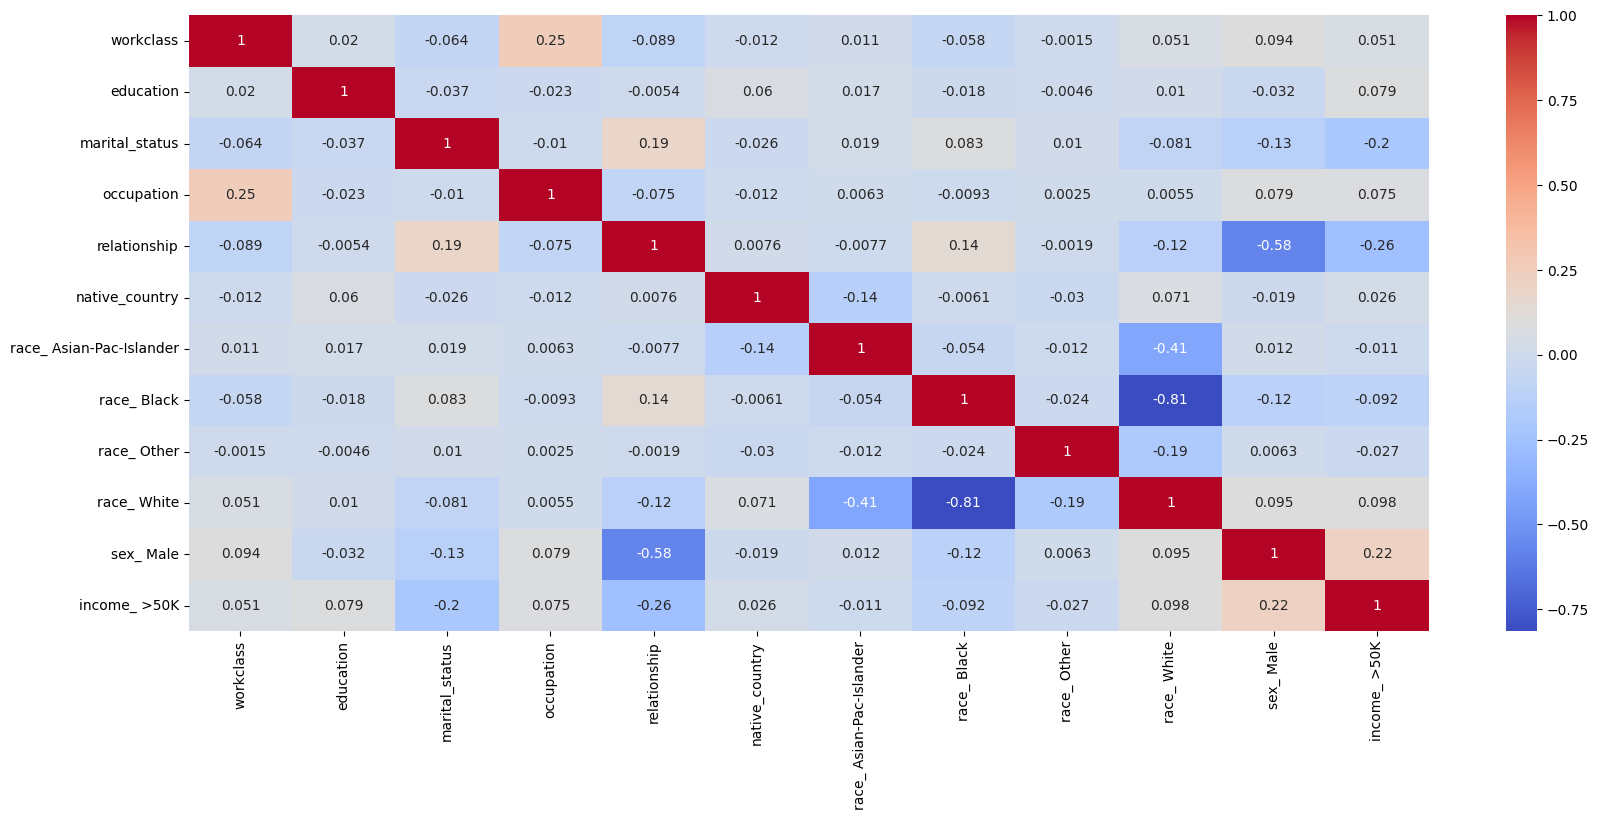

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Relevance of comparison:**

Correlation primarily measures linear relationships. It quantifies the strength and direction of a linear association between two variables. A high correlation (close to +1 or -1) indicates a strong linear relationship, while a correlation near 0 suggests a weak or no linear relationship. However, correlation can be misleading if the relationship is non-linear. For example, a parabolic relationship might have a correlation near 0, even though there's a clear pattern.

PPS, on the other hand, can detect both linear and non-linear relationships. It measures the ability of one variable to predict another, regardless of the functional form of the relationship. A high PPS indicates that the predictor variable has strong predictive power for the target variable, whether the relationship is linear or non-linear. This makes PPS more versatile than correlation for exploring relationships in data.


High PPS, High Correlation: Suggests a strong linear relationship.

High PPS, Low Correlation: Indicates a potential non-linear relationship. The predictor variable still has strong predictive power, but the relationship is not well captured by a linear model.

Low PPS, Low Correlation: Suggests a weak or no relationship, either linear or non-linear.

**Interpretation for this dataset:**

PPS and Correlation Matrix Corroborate Each Other: The analysis showed that the patterns observed in the PPS matrix were largely corroborated by the correlation matrix. This suggests that the relationships between the features in the dataset are primarily linear in nature, which are captured well by both metrics.

Limited Non-Linear Relationships: There were some instances where PPS revealed weak predictive power despite low correlation. These cases could indicate subtle non-linear relationships that were not evident in the correlation analysis. However, they were not strong enough to suggest a significant non-linearity in the dataset.